In [1]:
# pour changer la largeur de la page htlm générée par Jupyter :
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

C:\Users\e2201658\AppData\local\Temp\ipykernel_13092\568132765.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# TP : Exploration et Analyse de Données avec Pandas et Streamlit

## Objectif

Ce projet vise à développer vos compétences en manipulation et analyse de données à l'aide de la bibliothèque Pandas en Python. Vous apprendrez à :

- Importer et explorer des données provenant de Kaggle.
- Effectuer des requêtes et manipulations de type SQL avec Pandas.
- Créer des visualisations interactives avec Streamlit.

Ce projet est noté. Tous les codes devront être écrits en Python dans des champs *jupyter* et devront respecter les conventions de nommage. L'énoncé **ne doit pas être modifié**.

La derniere séance du projet, vous déposerez le fichier jupyter (projetSAE.ipynb) sur la plateforme pédagogique.


##### Procédure à réaliser avant les séances de TD (nous utiliserons désormais jupyter lab)
- Lancer Anaconda Prompt sous Windows
- Saisissez dans Anaconda Prompt : 
conda create -n projet python pandas numpy matplotlib jupyterlab kagglehub seaborn streamlit plotly

=> à la demande "Proceed ([y]/n)?" saisissez y (ou juste pressez sur la touche "entrée")
=> "Executing transaction" prend du temps, c'est normal
Saisissez dans Anaconda Prompt : 
conda activate projet

##### Saisissez dans Anaconda Prompt : 
jupyter lab --notebook-dir="h:/"
Ouvrir projetSAE.ipynb dans Jupyter

In [28]:
%matplotlib notebook
%matplotlib inline
%pip install python
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import streamlit as st

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement python (from versions: none)
ERROR: No matching distribution found for python


### Partie 1 : importation et exploration des données

#### Travailler avec Git
1 - En utilisant le prompt conda : initialiser le projet 

2 - Ajouter le fichier Jupyter Notebook et faite votre premier commit 
 
3 -  Creer un projet sur github dépôt distant (sans README.md )

4 - Pousser le projet vers ce dépôt 

5 - Enlever les checkpoint de jupyter 

#### Questions
1. Téléchargez le Dataset **Data Science Salaries 2023** sur Kaggle (https://www.kaggle.com/datasets/) via **kagglehub**.
2. Copier le fichier du cache au répertoire du projet, décompresser et visualiser le fichier CSV **ds_salaries.csv**
3. Importez le fichiers CSV avec Pandas.

##### Votre code

In [18]:

df = pd.read_csv('H:/projet_notebook/archive/ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


##### Une bonne pratique 
- Copier les données téléchargées et les coller dans le répertoire du projet.
Pour cela, utilisez la bibliothéque os et shutil

In [13]:
# Répertoire cible dans votre projet
#project_dir = r"....."

# Créer le répertoire (si nécessaire)
os.makedirs(project_dir, exist_ok=True)

# Copier le fichier depuis le cache au répertoire du projet
#cache_file = r"..........ds_salaries.csv"
shutil.copy(cache_file, project_dir)

NameError: name 'project_dir' is not defined

In [14]:
# Lire le fichier depuis le répertoire du projet


### Partie 2 : Analyses exploratoires

#### Question 1 :
Nous Souhaitons :

1. Connaitre est ce qu'il y a des données manquantes dans notre dataset.
2. Voir la distribution des salaires en USD avec la bibliothèque seaborn sous fome d'histogramme
3. avoir la liste des pays concerné par l'étude 
4. connaitre les salaire moyen par rôle, par pays, par niveau d'expérience

#### Votre code

In [47]:
#données manquantes 
missing_data = df.isnull().sum()

# Afficher les résultats
print("Données manquantes par colonne :")
print(missing_data)

Données manquantes par colonne :
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
salary_range          0
dtype: int64


Aucune valeur manquante n'apparait

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


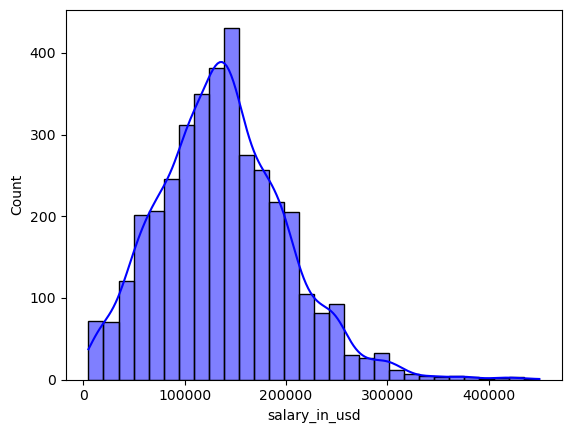

In [50]:
# Distribution des salaires en USD
sns.histplot(df['salary_in_usd'], kde=True, color='blue', bins=30)
plt.show()

Le pic de répartition des salaires se trouve aux alentours de 150 000 USD

In [20]:
# liste des pays concerné par l'étude 

countries = df['employee_residence'].unique()

# Afficher la liste des pays
print("Liste des pays concernés par l'étude :")
print(countries)


Liste des pays concernés par l'étude :
['ES' 'US' 'CA' 'DE' 'GB' 'NG' 'IN' 'HK' 'PT' 'NL' 'CH' 'CF' 'FR' 'AU'
 'FI' 'UA' 'IE' 'IL' 'GH' 'AT' 'CO' 'SG' 'SE' 'SI' 'MX' 'UZ' 'BR' 'TH'
 'HR' 'PL' 'KW' 'VN' 'CY' 'AR' 'AM' 'BA' 'KE' 'GR' 'MK' 'LV' 'RO' 'PK'
 'IT' 'MA' 'LT' 'BE' 'AS' 'IR' 'HU' 'SK' 'CN' 'CZ' 'CR' 'TR' 'CL' 'PR'
 'DK' 'BO' 'PH' 'DO' 'EG' 'ID' 'AE' 'MY' 'JP' 'EE' 'HN' 'TN' 'RU' 'DZ'
 'IQ' 'BG' 'JE' 'RS' 'NZ' 'MD' 'LU' 'MT']


In [22]:
# Salaire moyen par rôle
average_salary_role = df.groupby('job_title')['salary_in_usd'].mean()

# Afficher les résultats
print("Salaire moyen par rôle :")
print(average_salary_role)

# Salaire moyen par pays
average_salary_country = df.groupby('employee_residence')['salary_in_usd'].mean()

# Afficher les résultats
print("Salaire moyen par pays :")
print(average_salary_country)

# Salaire moyen par niveau d'expérience
average_salary_experience = df.groupby('experience_level')['salary_in_usd'].mean()

# Afficher les résultats
print("Salaire moyen par niveau d'expérience :")
print(average_salary_experience)



Salaire moyen par rôle :
job_title
3D Computer Vision Researcher     21352.250000
AI Developer                     136666.090909
AI Programmer                     55000.000000
AI Scientist                     110120.875000
Analytics Engineer               152368.631068
                                     ...      
Research Engineer                163108.378378
Research Scientist               161214.195122
Software Data Engineer            62510.000000
Staff Data Analyst                15000.000000
Staff Data Scientist             105000.000000
Name: salary_in_usd, Length: 93, dtype: float64
Salaire moyen par pays :
employee_residence
AE    100000.000000
AM     50000.000000
AR     35500.000000
AS     32777.500000
AT     71125.833333
          ...      
TR     19058.000000
UA     57850.000000
US    152822.011651
UZ    103000.000000
VN     33466.666667
Name: salary_in_usd, Length: 78, dtype: float64
Salaire moyen par niveau d'expérience :
experience_level
EN     78546.284375
EX    19493

#### Question 2 :
Nous Souhaitons :

1. Filtrer les salaires pour un pays donné (ex : US)
2. Connaitre les top 5 des entreprises qui paient le plus

3. Filtrage et agrégation:
    - Afficher tous les employés dont le salaire est supérieur à 100 000 USD, ainsi que leur rôle.
    - Pays avec la plus forte proportion de télétravail (remote_ratio = 100)
       
4. Requêtes conditionnelles: 
    - Salaire moyen des employés à distance (100%)
    - Comparer salaires moyens pour deux catégories
        
5. Ajouter une colonne pour les fourchettes de salaires
6. Corrélations : Relation entre télétravail et salaire: 
 -
7. Salaire moyen par taille d'entreprise 
8. faire un tableau croisé : Moyenne des salaires par niveau d'expérience et télétravail

In [24]:
# Filtrer les salaires pour un pays donné (ex : US)

country_filtered = df[df['employee_residence'] == 'US']

# Afficher les résultats filtrés
print("Données pour les États-Unis (US) :")
print(country_filtered[['job_title', 'salary_in_usd']])



Données pour les États-Unis (US) :
                     job_title  salary_in_usd
1                  ML Engineer          30000
2                  ML Engineer          25500
5            Applied Scientist         222200
6            Applied Scientist         136000
9               Data Scientist         147100
...                        ...            ...
3749           Data Specialist         165000
3750            Data Scientist         412000
3751  Principal Data Scientist         151000
3752            Data Scientist         105000
3753     Business Data Analyst         100000

[3004 rows x 2 columns]


In [51]:
# Top 5 des entreprises qui paient le plus

top_5_companies = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).head(5)

# Afficher les résultats
print("Top 5 des entreprises qui paient le plus :")
print(top_5_companies)


Top 5 des entreprises qui paient le plus :
company_location
IL    271446.500000
PR    167500.000000
US    151822.009539
RU    140333.333333
CA    131917.689655
Name: salary_in_usd, dtype: float64


L'équart entre la première et la deuxieme entreprise est bien plus important que l'écart entre les suivant.
A titre de comparaison, l'équart entre les deux premiers est plus de trois fois supérieurs à l'équart entre le deuxième et le cinquième

In [27]:
# Filtrer les données
# Rôles avec un salaire moyen supérieur à 100,000

average_salary_role = df.groupby('job_title')['salary_in_usd'].mean()

# Filtrer les rôles avec un salaire moyen supérieur à 100,000 USD
roles_above_100k = average_salary_role[average_salary_role > 100000]

# Afficher les résultats
print("Rôles avec un salaire moyen supérieur à 100,000 USD :")
print(roles_above_100k)


# Pays avec la plus forte proportion de télétravail (remote_ratio = 100)

remote_100 = df[df['remote_ratio'] == 100]

# Compter la proportion de télétravail (remote_ratio = 100) par pays
remote_100_by_country = remote_100['company_location'].value_counts()

# Afficher les résultats
print("Proportion de télétravail à 100% par pays :")
print(remote_100_by_country)


Rôles avec un salaire moyen supérieur à 100,000 USD :
job_title
AI Developer                                136666.090909
AI Scientist                                110120.875000
Analytics Engineer                          152368.631068
Applied Data Scientist                      113726.300000
Applied Machine Learning Scientist          109452.833333
Applied Scientist                           190264.482759
BI Analyst                                  104888.888889
BI Developer                                129846.153846
Big Data Architect                          125802.500000
Business Intelligence Engineer              174150.000000
Cloud Data Architect                        250000.000000
Cloud Database Engineer                     155000.000000
Computer Vision Engineer                    143536.111111
Data Analyst                                108716.227124
Data Analytics Lead                         211254.500000
Data Analytics Manager                      141879.090909
Data Arc

In [34]:
# Requêtes conditionnelles
# Salaire moyen des employés à distance (100%)
# Filtrer les données pour les employés à distance (remote_ratio = 100)
remote_100_salary = df[df['remote_ratio'] == 100]['salary_in_usd'].mean()

# Afficher le salaire moyen des employés à distance
print(f"Salaire moyen des employés à distance (remote_ratio = 100%) : {remote_100_salary:.2f} USD")

# Comparer salaires moyens pour deux catégories



# Afficher les résultats de comparaison

print(f"Salaire moyen des employés non à distance (remote_ratio != 100%) : {remote_non_100_salary:.2f} USD")


Salaire moyen des employés à distance (remote_ratio = 100%) : 136481.45 USD
Salaire moyen des employés non à distance (remote_ratio != 100%) : 138417.51 USD


In [46]:
# Ajouter une colonne pour les fourchettes de salaires
def salary_range(salary):
    if salary < 50000:
        return 'Faible'
    elif 50000 <= salary < 100000:
        return 'Moyenne'
    elif 100000 <= salary < 150000:
        return 'Haute'
    else:
        return 'Très élevée'

# Appliquer la fonction à la colonne salary_in_usd et ajouter la nouvelle colonne 'salary_range'
df['salary_range'] = df['salary_in_usd'].apply(salary_range)

# Afficher les premières lignes du DataFrame pour vérifier
print(df[['salary_in_usd', 'salary_range']].head(20))



    salary_in_usd salary_range
0           85847      Moyenne
1           30000       Faible
2           25500       Faible
3          175000  Très élevée
4          120000        Haute
5          222200  Très élevée
6          136000        Haute
7          219000  Très élevée
8          141000        Haute
9          147100        Haute
10          90700      Moyenne
11         130000        Haute
12         100000        Haute
13         213660  Très élevée
14         130760        Haute
15         147100        Haute
16          90700      Moyenne
17         170000  Très élevée
18         150000  Très élevée
19         150000  Très élevée


Salaire moyen par niveau de télétravail (remote_ratio) :
remote_ratio
0      144316.202288
50      78400.687831
100    136481.452830
Name: salary_in_usd, dtype: float64


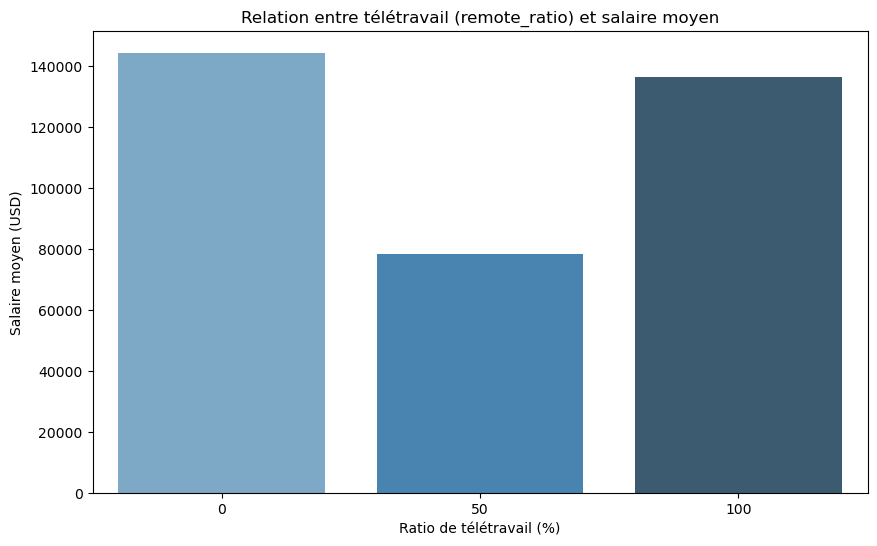

In [52]:
# Analyse des corrélations

# Calculer le salaire moyen par niveau de télétravail (remote_ratio)
salary_by_remote = df.groupby('remote_ratio')['salary_in_usd'].mean()

# Afficher les résultats
print("Salaire moyen par niveau de télétravail (remote_ratio) :")
print(salary_by_remote)

# Relation entre télétravail et salaire
# Visualisation avec seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=salary_by_remote.index, y=salary_by_remote.values, palette="Blues_d")
plt.title("Relation entre télétravail (remote_ratio) et salaire moyen")
plt.xlabel("Ratio de télétravail (%)")
plt.ylabel("Salaire moyen (USD)")
plt.show()


On remarque une grande différence entre ceux qui ont 50% de télétravail et ceux qui, n'ont pas de télétravail ou uniquement du télétravail.

In [53]:
# Salaire moyen par taille d'entreprise
# Calculer le salaire moyen par taille d'entreprise
salary_by_company_size = df.groupby('company_size')['salary_in_usd'].mean()

# Afficher les résultats
print("Salaire moyen par taille d'entreprise :")
print(salary_by_company_size)


Salaire moyen par taille d'entreprise :
company_size
L    118300.982379
M    143130.548367
S     78226.682432
Name: salary_in_usd, dtype: float64


Ce sont les entreprises de taille moyenne qui ont la moyenne de rémunération la plus haute

In [54]:
# Calculer la moyenne des salaires par niveau d'expérience et télétravail
pivot_table = df.pivot_table(
    index='experience_level',  # Niveau d'expérience
    columns='remote_ratio',     # Télétravail (remote_ratio)
    values='salary_in_usd',     # Salaire
    aggfunc='mean'              # Fonction d'agrégation (moyenne)
)

# Afficher le tableau croisé
print("Tableau croisé des salaires par niveau d'expérience et télétravail :")
print(pivot_table)


Tableau croisé des salaires par niveau d'expérience et télétravail :
remote_ratio                0              50             100
experience_level                                             
EN                104581.765766   64006.230769   65040.486111
EX                182435.785714  139030.166667  214837.326923
MI                116723.103535   74214.405405   96803.480597
SE                154024.064706   98438.136364  154022.023381


La moyenne de salaire la plus haute est concerné par des individus EX, 100% en télétravail.